In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df=data.rename({'R&D Spend':'RD','Administration':'AD','Marketing Spend':'MS'},axis=1)

In [4]:
df.head()

,RD,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.corr()

,RD,AD,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
AD,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RD      50 non-null     float64
 1   AD      50 non-null     float64
 2   MS      50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Analysing correlation with pairplot


In [8]:
import seaborn as sns

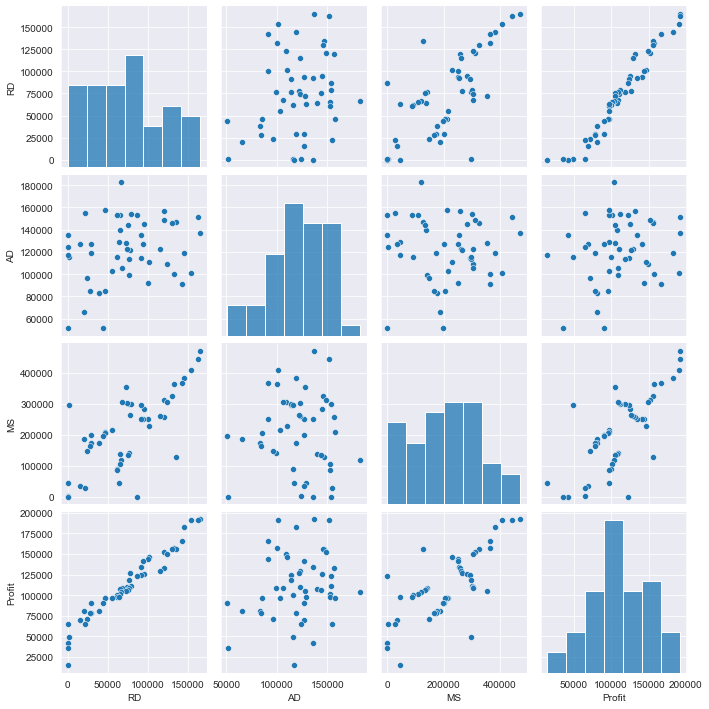

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

# Model Building

In [10]:
import statsmodels.formula.api as smf 
model=smf.ols("Profit~AD+RD+MS",data=df).fit()

In [11]:
model.params

Intercept    50122.192990
AD              -0.026816
RD               0.805715
MS               0.027228
dtype: float64

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           4.53e-30
Time:                        11:26:53   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
AD            -0.0268      0.051     -0.526      0.602      -0.130       0.076
RD             0.8057      0.045     17.846      0.000       0.715       0.897
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# Bulding SLR and MLR for insignificant variables AD and MS

In [14]:
sl_a=smf.ols('Profit~AD',data=df).fit()
sl_a.tvalues, sl_a.pvalues

(Intercept    3.040044
 AD           1.419493
 dtype: float64,
 Intercept    0.003824
 AD           0.162217
 dtype: float64)

In [15]:
sl_m=smf.ols('Profit~MS',data=df).fit()
sl_a.tvalues, sl_a.pvalues

(Intercept    3.040044
 AD           1.419493
 dtype: float64,
 Intercept    0.003824
 AD           0.162217
 dtype: float64)

In [16]:
ml_AM=smf.ols('Profit~AD+MS',data=df).fit()
ml_AM.tvalues,ml_AM.pvalues

(Intercept    1.142741
 AD           2.467779
 MS           8.281039
 dtype: float64,
 Intercept    2.589341e-01
 AD           1.729198e-02
 MS           9.727245e-11
 dtype: float64)

# calculating VIF 

In [17]:
rsq_r=smf.ols("RD~AD+MS",data=df).fit().rsquared
vif_r=1/(1-rsq_r)


In [18]:
rsq_a=smf.ols("AD~RD+MS",data=df).fit().rsquared
vif_a=1/(1-rsq_a)

In [19]:
rsq_m=smf.ols('MS~RD+AD',data=df).fit().rsquared
vif_m=1/(1-rsq_m)

In [20]:
#creating data frame for vif 
d1={'Variables':['RD','AD','MS'],'VIF':[vif_r,vif_a,vif_m]}
vif_f=pd.DataFrame(d1)
vif_f

,Variables,VIF
0,RD,2.468903
1,AD,1.175091
2,MS,2.326773


In [21]:
vif_f=pd.DataFrame({'Variables':['RD','AD','MS'],'VIF':[vif_r,vif_a,vif_m]})
vif_f

,Variables,VIF
0,RD,2.468903
1,AD,1.175091
2,MS,2.326773


In [22]:
# VIF <10 so thier in no collinerity

In [23]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [24]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

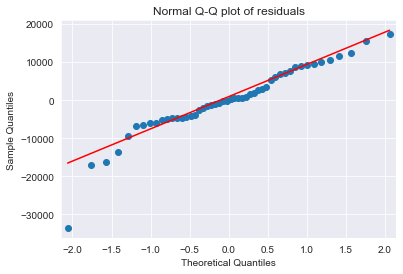

In [25]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()



In [26]:
# Test for Homoscedasticity or Heteroscedasticity

def standard_value(vals):return(vals-vals.mean())/vals.std() #user defined Z=(X-mu)/sigma

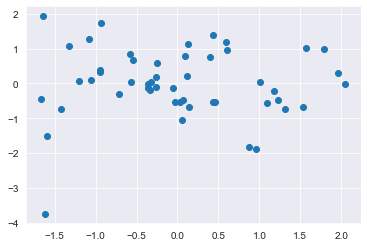

In [27]:
import matplotlib.pyplot as plt
plt.scatter(standard_value(model.fittedvalues),standard_value(model.resid))

In [28]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code.

In [29]:
from statsmodels.graphics.regressionplots import influence_plot

eval_env: 1


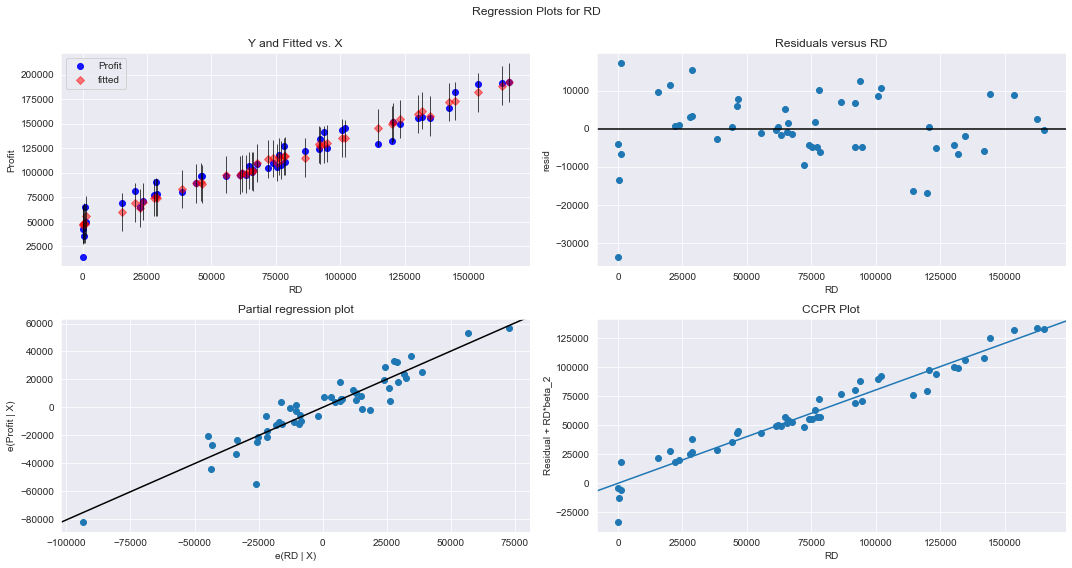

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RD',fig=fig)
plt.show()

eval_env: 1


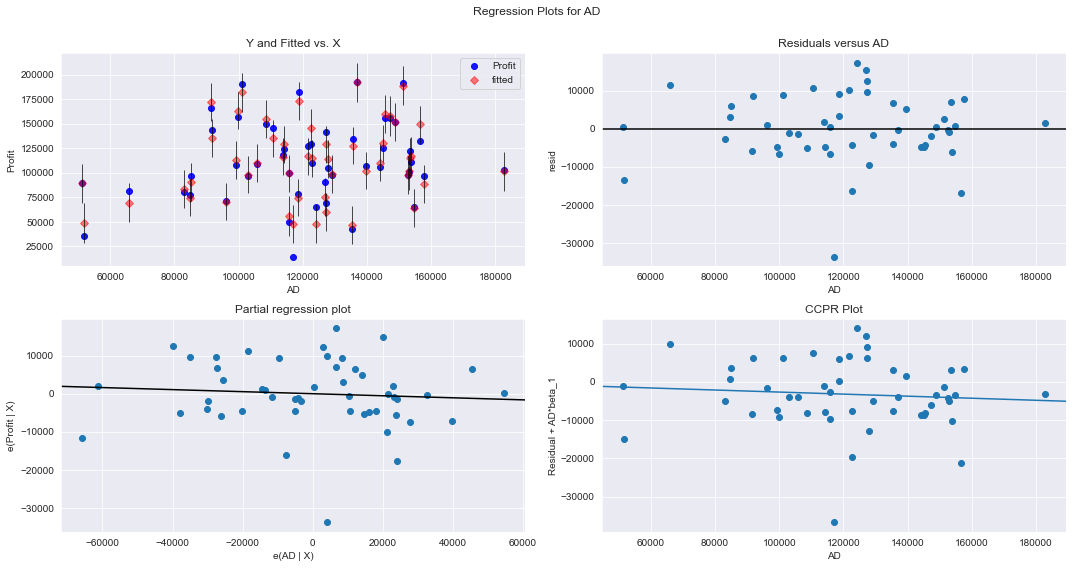

In [31]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'AD',fig=fig)
plt.show()

eval_env: 1


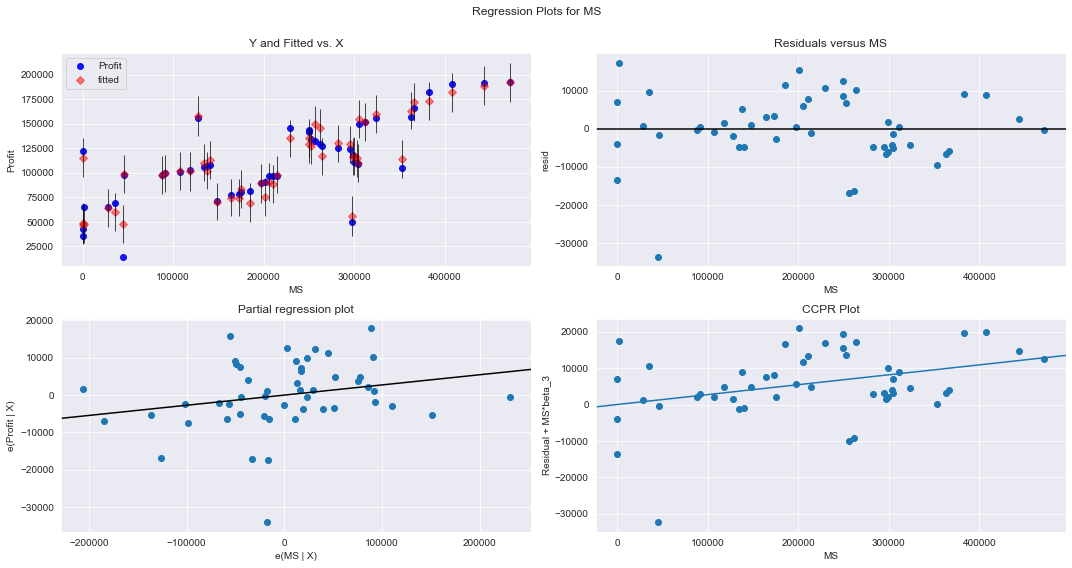

In [32]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MS',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)


# Cook's Distance

In [33]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance


In [34]:
model_influence=model.get_influence() #to get influence poinnts
(c,_)=model_influence.cooks_distance #to get greater influence points

In [35]:
(c,_)

(array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
        1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
        4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
        1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
        8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
        4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
        5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
        1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
        7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
        5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
        1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
        1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
        1.90527441e-01, 2.88082293e-01]),
 array([1.        , 0.99997771, 0.99791128, 0.99904583, 0.9995713 ,
        0.99971836, 0.9999

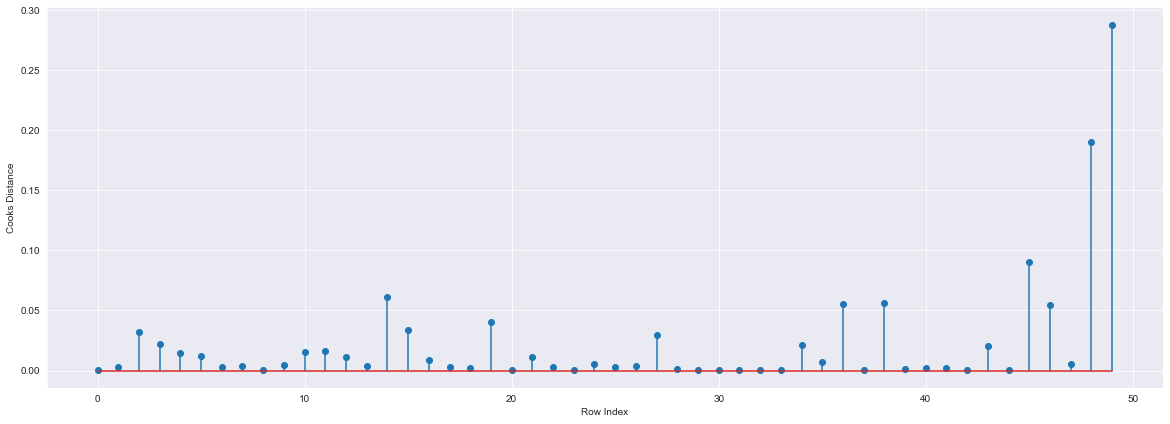

In [37]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,7))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [38]:
# Index and value of influencer where c is more rhan .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432656)

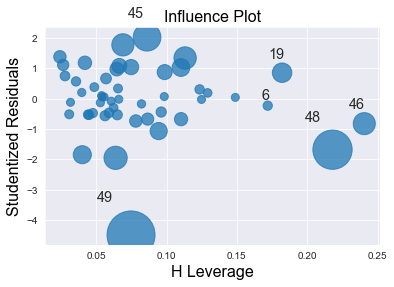

In [39]:
#High influence points
influence_plot(model)
plt.show()

In [41]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=df.shape[1]
n=df.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [42]:
df[df.index.isin([49])]

,RD,AD,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the Model

In [44]:
data2=df.drop(df.index[[49]],axis=0).reset_index(drop=True)
data2.head()

,RD,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [45]:
data2.tail()

,RD,AD,MS,State,Profit
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41


# Model Deletion Diagnostics and Final Model


In [49]:
model2=smf.ols("Profit~RD+AD+MS",data=data2).fit()

In [50]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           8.85e-32
Time:                        11:30:37   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD             0.7830      0.038     20.470      0.000       0.706       0.860
AD            -0.0222      0.043     -0.518      0.607      -0.109       0.064
MS             0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~RD+AD+MS",data=data2).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data2
    else:
        final_model=smf.ols("Profit~RD+AD+MS",data=data2).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209413
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.983114992639277
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improve

In [60]:
final_model.rsquared

0.9882757054424702

In [61]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     646.2
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           2.45e-22
Time:                        12:01:30   Log-Likelihood:                -253.87
No. Observations:                  27   AIC:                             515.7
Df Residuals:                      23   BIC:                             520.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.739e+04   3403.787     13.922      0.000    4.03e+04    5.44e+04
RD             0.6937      0.030     23.347      0.000       0.632       0.755
AD             0.0256      0.024      1.064      0.298      -0.024       0.075
MS             0.0472      0.011      4.335      0.000       0.025       0.070
==============================================================================
Omnibus:                        3.469   Durbin-Watson:                   2.329
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                2.329
Skew:                           0.713   Prob(JB):                        0.312
Kurtosis:                       3.190   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
# say New data for prediction is
new_data=pd.DataFrame({'RD':70000,"AD":90000,"MS":140000},index=[0])
new_data

,RD,AD,MS
0,70000,90000,140000


In [59]:
# Manual Prediction of Price
final_model.predict(new_data)

0    104858.729408
dtype: float64